In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, zoom
from skimage import io
from skimage.color import rgb2gray
from skimage.metrics import normalized_root_mse
from skimage.util import random_noise

In [2]:
def add_noise_to_image(image, noise_variance=0.1):
    noisy_image = random_noise(image, mode='gaussian', var=noise_variance)
    
    # Convert the noisy image back to the original scale (0 to 255) if needed
    noisy_image = np.clip(noisy_image * 255, 0, 255).astype(np.uint8)
    
    return noisy_image

In [3]:
def transform_image(image, rotation_angle=0, scaling_factor=1.0):
    rotated_image = rotate(image, rotation_angle, reshape=False)
    zoomed_image = zoom(rotated_image, (scaling_factor, scaling_factor, 1))
    return zoomed_image

In [4]:
def difference_images_grayscale(image1, image2):
    """ Compute the absolute difference between two images in grayscale. """
    # Convert both images to grayscale
    image1_gray = rgb2gray(image1)
    image2_gray = rgb2gray(image2)
    
    # Resize the images to the same shape
    min_shape = np.minimum(image1_gray.shape, image2_gray.shape)
    resized_image1 = image1_gray[:min_shape[0], :min_shape[1]]
    resized_image2 = image2_gray[:min_shape[0], :min_shape[1]]
    
    # Compute the absolute difference
    difference_image = np.abs(resized_image1 - resized_image2)
    
    return difference_image

In [5]:
def compute_correlation(image1, image2):
    """ Compute the correlation coefficient between two grayscale images. """
    image1_gray = rgb2gray(image1)
    image2_gray = rgb2gray(image2)
    
    min_shape = np.minimum(image1_gray.shape, image2_gray.shape)
    image1_gray = image1_gray[:min_shape[0], :min_shape[1]]
    image2_gray = image2_gray[:min_shape[0], :min_shape[1]]
    
    return np.corrcoef(image1_gray.ravel(), image2_gray.ravel())[0, 1]

In [6]:
def plot_images(original_image, transformed_image, difference_image, rotation_angle, scaling_factor, correlation_coefficient):
    
    if rotation_angle==0 and scaling_factor==1:
        fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    else:
        fig, axs = plt.subplots(1, 3, figsize=(6.2, 3.2))
    
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    
    axs[1].imshow(transformed_image)
    axs[1].set_title(f"Rotated {rotation_angle}° & Scaled {scaling_factor}")
    axs[1].axis("off")
    
    axs[2].imshow(difference_image, cmap='gray')  # Difference image in grayscale
    axs[2].set_title(f"Difference (Grayscale)\nCorr Coeff: {correlation_coefficient:.2f}")
    axs[2].axis("off")
    
    plt.tight_layout()
    plt.savefig(f'../static/img/correlation_r{rotation_angle}_s{scaling_factor}.png')
    plt.show()


In [7]:
def process_image(image_path, rotation_angle=30, scaling_factor=1.2):
    
    image = io.imread(image_path)
    
    noisy_image = add_noise_to_image(image)
    transformed_image = transform_image(noisy_image, rotation_angle, scaling_factor)
    
    # Create difference image in grayscale
    difference_image = difference_images_grayscale(image, transformed_image)
    
    # Compute correlation coefficient
    correlation_coefficient = compute_correlation(image, transformed_image)
    
    # Plot images
    plot_images(image, transformed_image, difference_image, rotation_angle, scaling_factor, correlation_coefficient)


In [8]:
image_path = "kevin.jpg"

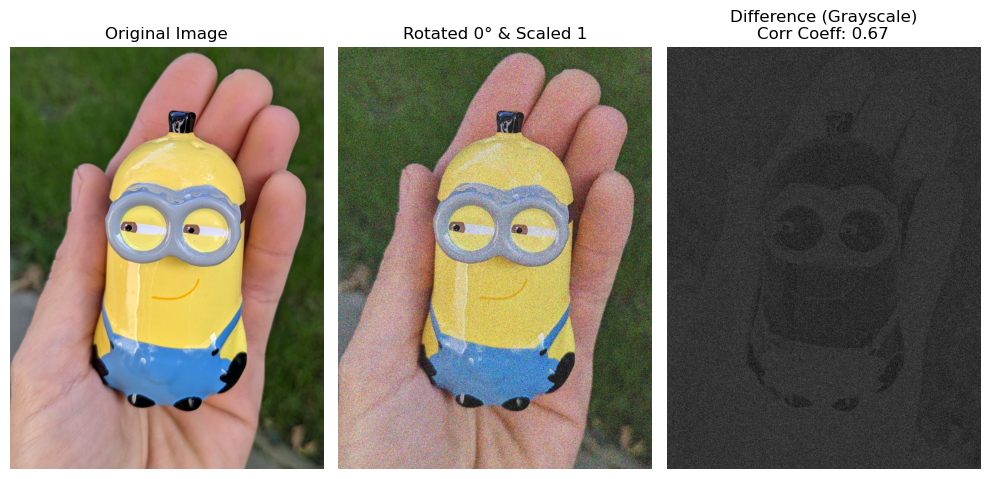

In [9]:
rotation_angle = 0
scaling_factor = 1
process_image(image_path, rotation_angle=rotation_angle, scaling_factor=scaling_factor)

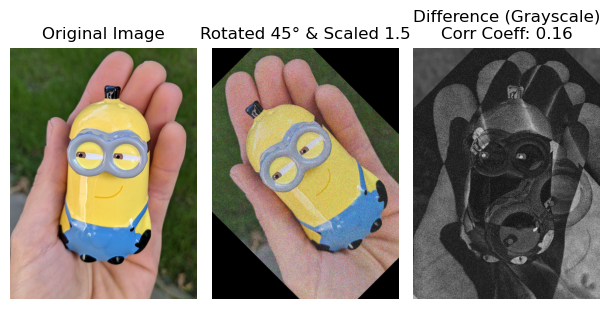

In [10]:
rotation_angle = 45
scaling_factor = 1.5
process_image(image_path, rotation_angle=rotation_angle, scaling_factor=scaling_factor)

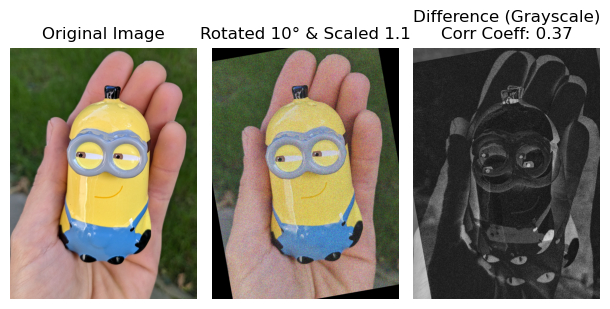

In [11]:
rotation_angle = 10
scaling_factor = 1.1
process_image(image_path, rotation_angle=rotation_angle, scaling_factor=scaling_factor)

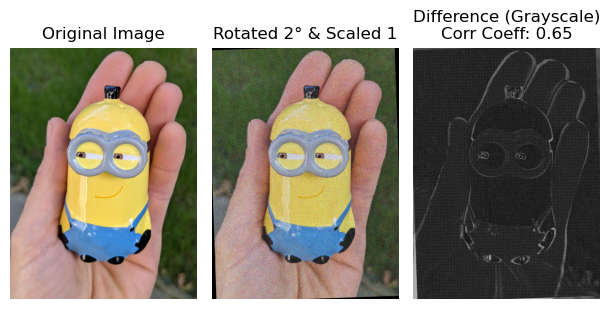

In [12]:
rotation_angle = 2
scaling_factor = 1
process_image(image_path, rotation_angle=rotation_angle, scaling_factor=scaling_factor)